In [51]:
import pandas as pd

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
print(star_wars.head(10))
print(star_wars.columns)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [52]:
star_wars = star_wars.loc[star_wars['RespondentID'].notnull(), :]

In [59]:
have_you_seen = 'Have you seen any of the 6 films in the Star Wars franchise?'
do_you_consider = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
yes_no_dict = {'Yes':True, 'No':False}

if not(True in star_wars[have_you_seen]):
    star_wars[have_you_seen] = star_wars[have_you_seen].map(yes_no_dict)
if not(True in star_wars[do_you_consider]):
    star_wars[do_you_consider] = star_wars[do_you_consider].map(yes_no_dict)

In [68]:
import numpy as np

movie_dict = {"Star Wars: Episode I  The Phantom Menace":True,
              "Star Wars: Episode II  Attack of the Clones":True,
              "Star Wars: Episode III  Revenge of the Sith":True,
              "Star Wars: Episode IV  A New Hope":True,
              "Star Wars: Episode V The Empire Strikes Back":True,
              "Star Wars: Episode VI Return of the Jedi":True,
              np.NaN:False, True:True, False:False}

name_change = {}
for i in range(1, 7):
    star_wars.iloc[:, i+2] = star_wars.iloc[:, i+2].map(movie_dict)
    name_change[star_wars.columns[i+2]] = 'seen' + str(i)
star_wars = star_wars.rename(columns=name_change)

In [82]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns=dict(zip(star_wars.columns[9:15].tolist(), ['ranking_' + str(i) for i in range(1,7)])))

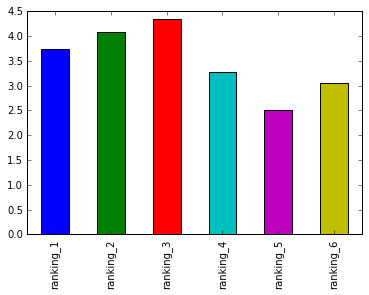

In [84]:
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar()

This is the markdown cell explaining what has been done so far and speculating why the average rankings appear as they do in the bar chart.

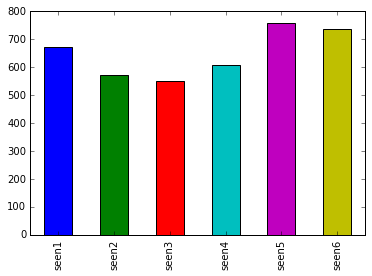

In [86]:
star_wars.loc[:, 'seen1':'seen6'].sum().plot.bar()

This is the markdown cell containing my thoughts about the bar chart of seen films and how they correlate with rankings.

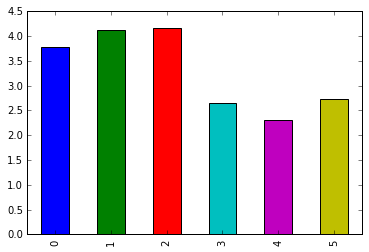

In [91]:
# I added this cell out of curiosity.
seen_means = []
for i in range(1,7):
    seen_means.append(star_wars.loc[star_wars['seen'+str(i)], 'ranking_' + str(i)].mean())
pd.Series(seen_means).plot.bar()

In [96]:
fan_str = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

are_fans = star_wars.loc[star_wars[fan_str] == True, :]
not_fans = star_wars.loc[star_wars[fan_str] == False, :]

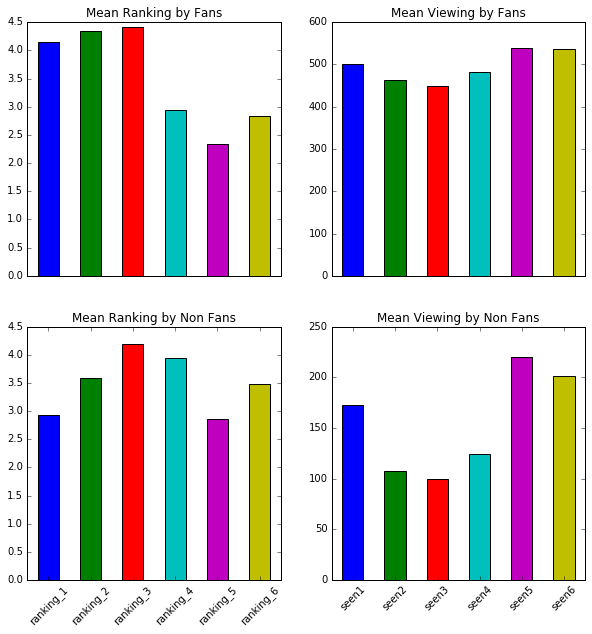

In [130]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

are_fans[are_fans.columns[9:15]].mean().plot.bar(ax=axes[0,0])
not_fans[not_fans.columns[9:15]].mean().plot.bar(ax=axes[1,0])
are_fans.loc[:, 'seen1':'seen6'].sum().plot.bar(ax=axes[0,1])
not_fans.loc[:, 'seen1':'seen6'].sum().plot.bar(ax=axes[1,1])

axes[0,0].set_title("Mean Ranking by Fans")
axes[1,0].set_title("Mean Ranking by Non Fans")
axes[0,1].set_title("Mean Viewing by Fans")
axes[1,1].set_title("Mean Viewing by Non Fans")

def rot_ax(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

rot_ax(axes[1,0])
rot_ax(axes[1,1])

axes[0,0].get_xaxis().set_visible(False)
axes[0,1].get_xaxis().set_visible(False)

plt.show()